<a href="https://colab.research.google.com/github/coderhetal/MNIST-Handwritten-digits-classification/blob/main/MNIST__CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN MODEL**



CONVOLUTION NEURAL NETWORK ::


# Importing the libraries :

In [44]:
import torch
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice and easy way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

from tqdm import tqdm  # For nice progress bar!



# Creating data loader



 DataLoader class provides an iterator over the dataset, enabling efficient batch processing. It takes the train_dataset as the input dataset, sets the batch_size to 64, and shuffles the data during each epoch by setting shuffle=True.

In [45]:
#   Load Data
train_dataset = datasets.MNIST(
    root="dataset/", train=True, transform=transforms.ToTensor(), download=True
)
test_dataset = datasets.MNIST(
    root="dataset/", train=False, transform=transforms.ToTensor(), download=True
)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


# Model

A simple neural network architecture with one hidden layer.

In [ ]:
from tqdm import tqdm  # For nice progress bar!

# Simple CNN
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=16,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1),
        )
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.conv2 = nn.Conv2d(
            in_channels=16,
            out_channels=24,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1),
        )
        self.fc1 = nn.Linear(24 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x



In [ ]:
# Hyperparameters
in_channels = 1
num_classes = 10
learning_rate = 0.001 # karpathy's constant
batch_size = 64
num_epochs = 5

# Setting device

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CNN()

# Initialize network
model = CNN().to(device)


## Loss and optimizer

In [ ]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
costs=[]
acc_list=[]
total_step=len(train_loader)

# Training and finding accuracy for training data

Training loop for a neural network, where the model is trained using mini-batches of data, computing gradients, and updating the model parameters iteratively.

The loss and accuracy values are tracked for monitoring the training progress.

In [83]:
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}")
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)


        # forward propagation
        scores = model(data)
        loss = criterion(scores, targets)
        costs.append(loss.item())

        # zero previous gradients
        optimizer.zero_grad()

        # back-propagation
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        # tracking accuracy
        total=targets.size(0)
        _, predictions = torch.max(scores.data,1)
        num_correct = (predictions == targets).sum().item()
        acc_list.append(num_correct/total)



        if (batch_idx + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, batch_idx + 1, total_step, loss.item(),
                          (num_correct / total) * 100))

Epoch: 1


 11%|█         | 105/938 [00:03<00:31, 26.05it/s]

Epoch [1/5], Step [100/938], Loss: 0.1062, Accuracy: 95.31%


 22%|██▏       | 205/938 [00:08<00:26, 27.84it/s]

Epoch [1/5], Step [200/938], Loss: 0.0414, Accuracy: 98.44%


 32%|███▏      | 304/938 [00:12<00:23, 27.09it/s]

Epoch [1/5], Step [300/938], Loss: 0.0441, Accuracy: 98.44%


 43%|████▎     | 404/938 [00:15<00:20, 26.68it/s]

Epoch [1/5], Step [400/938], Loss: 0.1298, Accuracy: 93.75%


 54%|█████▍    | 505/938 [00:20<00:16, 26.25it/s]

Epoch [1/5], Step [500/938], Loss: 0.0172, Accuracy: 100.00%


 64%|██████▍   | 605/938 [00:24<00:12, 26.74it/s]

Epoch [1/5], Step [600/938], Loss: 0.0992, Accuracy: 95.31%


 75%|███████▌  | 704/938 [00:27<00:08, 27.03it/s]

Epoch [1/5], Step [700/938], Loss: 0.0491, Accuracy: 96.88%


 86%|████████▌ | 802/938 [00:32<00:06, 19.55it/s]

Epoch [1/5], Step [800/938], Loss: 0.0063, Accuracy: 100.00%


 96%|█████████▋| 904/938 [00:36<00:01, 30.29it/s]

Epoch [1/5], Step [900/938], Loss: 0.0278, Accuracy: 98.44%


100%|██████████| 938/938 [00:37<00:00, 25.09it/s]


Epoch: 2


 11%|█         | 104/938 [00:03<00:27, 29.82it/s]

Epoch [2/5], Step [100/938], Loss: 0.0872, Accuracy: 96.88%


 22%|██▏       | 203/938 [00:08<00:26, 28.17it/s]

Epoch [2/5], Step [200/938], Loss: 0.0367, Accuracy: 100.00%


 32%|███▏      | 304/938 [00:12<00:23, 27.30it/s]

Epoch [2/5], Step [300/938], Loss: 0.0202, Accuracy: 100.00%


 43%|████▎     | 403/938 [00:16<00:20, 26.66it/s]

Epoch [2/5], Step [400/938], Loss: 0.0530, Accuracy: 98.44%


 54%|█████▎    | 504/938 [00:20<00:18, 24.00it/s]

Epoch [2/5], Step [500/938], Loss: 0.1052, Accuracy: 95.31%


 64%|██████▍   | 603/938 [00:24<00:11, 30.00it/s]

Epoch [2/5], Step [600/938], Loss: 0.0382, Accuracy: 98.44%


 75%|███████▍  | 703/938 [00:27<00:07, 30.64it/s]

Epoch [2/5], Step [700/938], Loss: 0.0098, Accuracy: 100.00%


 86%|████████▌ | 803/938 [00:31<00:06, 19.71it/s]

Epoch [2/5], Step [800/938], Loss: 0.1444, Accuracy: 98.44%


 96%|█████████▋| 905/938 [00:35<00:01, 27.08it/s]

Epoch [2/5], Step [900/938], Loss: 0.1982, Accuracy: 95.31%


100%|██████████| 938/938 [00:36<00:00, 25.53it/s]


Epoch: 3


 11%|█         | 104/938 [00:03<00:31, 26.74it/s]

Epoch [3/5], Step [100/938], Loss: 0.0680, Accuracy: 96.88%


 22%|██▏       | 202/938 [00:07<00:34, 21.33it/s]

Epoch [3/5], Step [200/938], Loss: 0.0080, Accuracy: 100.00%


 32%|███▏      | 303/938 [00:11<00:21, 29.49it/s]

Epoch [3/5], Step [300/938], Loss: 0.0107, Accuracy: 100.00%


 43%|████▎     | 403/938 [00:15<00:17, 30.17it/s]

Epoch [3/5], Step [400/938], Loss: 0.1266, Accuracy: 98.44%


 54%|█████▎    | 504/938 [00:18<00:16, 26.33it/s]

Epoch [3/5], Step [500/938], Loss: 0.0647, Accuracy: 96.88%


 65%|██████▍   | 606/938 [00:23<00:11, 29.30it/s]

Epoch [3/5], Step [600/938], Loss: 0.0551, Accuracy: 98.44%


 75%|███████▌  | 704/938 [00:26<00:08, 26.76it/s]

Epoch [3/5], Step [700/938], Loss: 0.0087, Accuracy: 100.00%


 86%|████████▌ | 803/938 [00:30<00:04, 28.01it/s]

Epoch [3/5], Step [800/938], Loss: 0.0765, Accuracy: 98.44%


 96%|█████████▌| 902/938 [00:35<00:01, 18.66it/s]

Epoch [3/5], Step [900/938], Loss: 0.0063, Accuracy: 100.00%


100%|██████████| 938/938 [00:36<00:00, 25.81it/s]


Epoch: 4


 11%|█         | 105/938 [00:03<00:28, 29.62it/s]

Epoch [4/5], Step [100/938], Loss: 0.0161, Accuracy: 98.44%


 22%|██▏       | 205/938 [00:07<00:24, 29.37it/s]

Epoch [4/5], Step [200/938], Loss: 0.0066, Accuracy: 100.00%


 32%|███▏      | 303/938 [00:11<00:33, 18.92it/s]

Epoch [4/5], Step [300/938], Loss: 0.0106, Accuracy: 100.00%


 43%|████▎     | 405/938 [00:15<00:19, 26.80it/s]

Epoch [4/5], Step [400/938], Loss: 0.0378, Accuracy: 98.44%


 54%|█████▎    | 503/938 [00:18<00:15, 27.30it/s]

Epoch [4/5], Step [500/938], Loss: 0.1171, Accuracy: 98.44%


 64%|██████▍   | 602/938 [00:22<00:15, 22.28it/s]

Epoch [4/5], Step [600/938], Loss: 0.0444, Accuracy: 98.44%


 75%|███████▌  | 704/938 [00:26<00:07, 29.35it/s]

Epoch [4/5], Step [700/938], Loss: 0.0478, Accuracy: 96.88%


 86%|████████▌ | 805/938 [00:30<00:04, 29.37it/s]

Epoch [4/5], Step [800/938], Loss: 0.0205, Accuracy: 100.00%


 96%|█████████▋| 905/938 [00:33<00:01, 31.25it/s]

Epoch [4/5], Step [900/938], Loss: 0.0082, Accuracy: 100.00%


100%|██████████| 938/938 [00:34<00:00, 27.14it/s]


Epoch: 5


 11%|█         | 104/938 [00:04<00:27, 30.05it/s]

Epoch [5/5], Step [100/938], Loss: 0.0316, Accuracy: 98.44%


 22%|██▏       | 205/938 [00:07<00:25, 28.43it/s]

Epoch [5/5], Step [200/938], Loss: 0.0101, Accuracy: 100.00%


 32%|███▏      | 304/938 [00:11<00:23, 27.07it/s]

Epoch [5/5], Step [300/938], Loss: 0.0320, Accuracy: 100.00%


 43%|████▎     | 405/938 [00:15<00:21, 24.96it/s]

Epoch [5/5], Step [400/938], Loss: 0.0195, Accuracy: 98.44%


 54%|█████▎    | 504/938 [00:19<00:15, 27.56it/s]

Epoch [5/5], Step [500/938], Loss: 0.0342, Accuracy: 100.00%


 64%|██████▍   | 604/938 [00:22<00:11, 28.65it/s]

Epoch [5/5], Step [600/938], Loss: 0.0110, Accuracy: 100.00%


 75%|███████▍  | 702/938 [00:27<00:13, 17.31it/s]

Epoch [5/5], Step [700/938], Loss: 0.0035, Accuracy: 100.00%


 86%|████████▌ | 803/938 [00:31<00:04, 28.21it/s]

Epoch [5/5], Step [800/938], Loss: 0.0406, Accuracy: 98.44%


 96%|█████████▋| 903/938 [00:34<00:01, 30.22it/s]

Epoch [5/5], Step [900/938], Loss: 0.0071, Accuracy: 100.00%


100%|██████████| 938/938 [00:35<00:00, 26.40it/s]


In [84]:
import matplotlib.pyplot as plt

# Plotting the loss and accuracy for training data

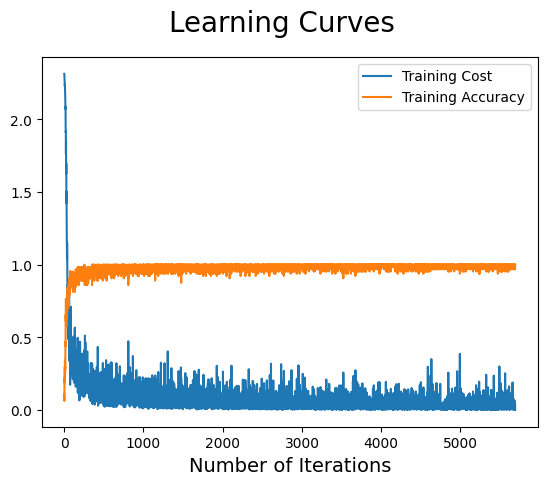

In [85]:
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(costs, label = 'Training Cost')
plt.plot(acc_list, label = 'Training Accuracy')
plt.legend()
plt.savefig('CNN.png')

In [86]:
import numpy as np

# Accuracy for test data :

In [88]:
model.eval()
for i, (images, targets) in enumerate(test_loader):
    images = images.to(device=device)
    targets= targets.to(device=device)
    #images =  images.reshape( images.shape[0], -1)
    outputs = model(images)
    loss = criterion(outputs, targets)
    costs.append(loss.item())
    total = targets.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted ==targets).sum().item()
    acc_list.append(correct / total)
acc = np.mean(np.array(acc_list))
print("Accuracy over Test set is : ",100*acc)

Accuracy over Test set is :  97.6323156010656
